<a href="https://colab.research.google.com/github/piyushthakur16/Breast-cancer-classifier-Using-Machine-Learning/blob/master/Customer_Churn_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Customer Churn Dataset Analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df=df.drop('customerID',axis=1)

In [6]:
df.shape

(7043, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#we want total charges as float value but its shows object as Dtype. So, we want to remove string values
count=0;

for i  in df.TotalCharges:
  if i==' ':
    count+=1;
print ('count of empty string: ', count)

df['TotalCharges']= df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges']=df['TotalCharges'].astype(float)

count of empty string:  11


In [10]:
#Remove null values with mean

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
num = tuple(df.select_dtypes(include=['int64','float64']).keys())
cat = tuple(df.select_dtypes(include='O').keys())
print(cat)
print(num)



('gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn')
('SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges')


In [13]:
#Cleaning data
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')


In [14]:
for i in cat:
  print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (au

In [15]:
for i in cat:
  df[i]=df[i].replace('Yes',1)
  df[i]=df[i].replace('No',0)


In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [17]:
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label = LabelEncoder()
#df['InternetService']=label.fit_transform(df['InternetService'])
df['Contract']=label.fit_transform(df['Contract'])
df['PaymentMethod']=label.fit_transform(df['PaymentMethod'])


In [20]:
df.InternetService = df.InternetService.replace(0,'0')

In [21]:
df['InternetService']=label.fit_transform(df['InternetService'])

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [24]:
num

('SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges')

In [25]:
scale_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
#scale_cols contain that columns which are having large numerical values, 
#and with MinMaxScaler we will scale it into values between -1 to 1.
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_col]=scale.fit_transform(df[scale_col])


In [26]:
#MODEL

x = df.drop('Churn',axis=1)
y = df['Churn']


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(4930, 19)
(2113, 19)


In [27]:
#STATISTICS
#Null Hypotheis :there is no effect of gender on churn
#Alter: There is effect of gender on churn
cont_table = pd.crosstab( df['Churn'],df['gender'])
cont_table

gender,0,1
Churn,,
0,2549,2625
1,939,930


In [28]:
scipy.stats.chi2_contingency(cont_table, correction=True)

(0.4840828822091383,
 0.48657873605618596,
 1,
 array([[2562.38989067, 2611.61010933],
        [ 925.61010933,  943.38989067]]))

##Since the P_value>0.05, we cannot reject null hypothesis. There is no evidence of impact of gender on churn rate

**Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.**


###**LET US DEFINE A FUNCTION FOR CHISQUARE TEST FOR DIFFERENT CATEGORICAL VARIABLES WITH ONLY TWO OUTPUT OPTIONS ON OUR Y VARIABLE='Churn'**

In [29]:
my_list=[]
def chi_test(a):
  for i in cols:
    cont_table = pd.crosstab(df['Churn'], df[i])
    #print(cont_table)
    chi2, p, dof, ex = scipy.stats.chi2_contingency(cont_table,correction=True)
    print('The P_value of the chi_square test is:-', p)

    if(p<0.05):
      print('Model relationship exists')
      my_list.append(i)
    else:
      print('Model Relationship Doesnot exist')
    print('\n')

cols = ['gender','SeniorCitizen','Partner', 'Dependents','PhoneService', 'MultipleLines',	'OnlineSecurity',	'OnlineBackup', 'DeviceProtection','TechSupport',	'StreamingTV','StreamingMovies', 'PaperlessBilling']

chi_test(cols)


print(my_list)

The P_value of the chi_square test is:- 0.48657873605618596
Model Relationship Doesnot exist


The P_value of the chi_square test is:- 1.510066805092378e-36
Model relationship exists


The P_value of the chi_square test is:- 2.1399113440759935e-36
Model relationship exists


The P_value of the chi_square test is:- 4.9249216612154196e-43
Model relationship exists


The P_value of the chi_square test is:- 0.3387825358066928
Model Relationship Doesnot exist


The P_value of the chi_square test is:- 0.0008433795342472412
Model relationship exists


The P_value of the chi_square test is:- 1.2320984831180024e-46
Model relationship exists


The P_value of the chi_square test is:- 6.214092807254819e-12
Model relationship exists


The P_value of the chi_square test is:- 3.315693222362868e-08
Model relationship exists


The P_value of the chi_square test is:- 2.9235674453140758e-43
Model relationship exists


The P_value of the chi_square test is:- 1.3024835736732686e-07
Model relationship exist

In [30]:
print('The following columns need to be dropped as they do not influence the y_variable much to impact; These are:' )
for i in cols:
  if i not in my_list:
    #print('\n')
    print(i)
  

The following columns need to be dropped as they do not influence the y_variable much to impact; These are:
gender
PhoneService


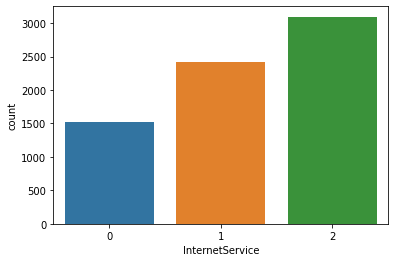

In [31]:
sns.countplot(x="InternetService", data=df)

In [33]:
for i in cols:
  if i not in my_list:
    df=df.drop(i,axis=1)

In [34]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.013889,0,1,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.472222,0,1,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.027778,0,1,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.625000,0,1,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0.027778,0,2,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [35]:
X = df.drop('Churn', axis=1)
y=df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [36]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

In [37]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7969471068512602

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)
pred = clf_forest.predict(X_train)
print(accuracy_score(y_train, pred))
#0.8860835950712732
pred_test = clf_forest.predict(X_test)
print(accuracy_score(y_test, pred_test))
#0.842512077294686


0.8824991125310614
0.8062455642299503


In [39]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)
clf.fit(X, y)
clf.best_params_
print(clf.best_score_)

0.7934134863539584


In [40]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0.013889,0,1,0,1,0,0,0,0,0,1,2,0.115423,0.001275
1,0,0,0,0.472222,0,1,1,0,1,0,0,0,1,0,3,0.385075,0.215867
2,0,0,0,0.027778,0,1,1,1,0,0,0,0,0,1,3,0.354229,0.010310
3,0,0,0,0.625000,0,1,1,0,1,1,0,0,1,0,0,0.239303,0.210241
4,0,0,0,0.027778,0,2,0,0,0,0,0,0,0,1,2,0.521891,0.015330


In [42]:
X=pd.get_dummies(df,columns=my_list,drop_first=True)

#X=X.drop('Churn', axis=1)

In [43]:
X.head()

,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_1,Dependents_1,MultipleLines_1,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,PaperlessBilling_1
0,0.013889,1,0,2,0.115423,0.001275,0,0,1,0,0,0,1,0,0,0,0,1
1,0.472222,1,1,3,0.385075,0.215867,0,0,0,0,0,1,0,1,0,0,0,0
2,0.027778,1,0,3,0.354229,0.010310,1,0,0,0,0,1,1,0,0,0,0,1
3,0.625000,1,1,0,0.239303,0.210241,0,0,0,0,0,1,0,1,1,0,0,0
4,0.027778,2,0,2,0.521891,0.015330,1,0,0,0,0,0,0,0,0,0,0,1


#**RESAMPLING THE DATA**

In [45]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [46]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))
#5174

5174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution After Resampling')

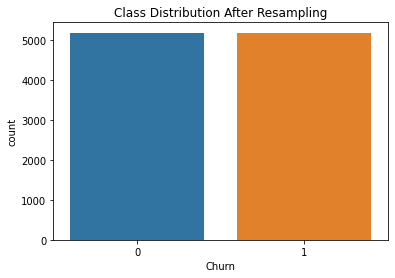

In [47]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [48]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


#**Model Creation And Evaluation**

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)
pred = clf_forest.predict(X_train)
print(accuracy_score(y_train, pred))
#0.8860835950712732
pred_test = clf_forest.predict(X_test)
print(accuracy_score(y_test, pred_test))
#0.842512077294686


0.9019086735926553
0.8676328502415459


In [51]:
  X.shape

(10348, 17)

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)
clf.fit(X, y)
clf.best_params_
print(clf.best_score_)

0.9045230840355559


#**We have achieved an overall accuracy of almost 90%. This is the mean cross-validated score of the best_estimator.In the previous random forest, the mean score was approximately 88% (90% on training and 86% on test). Using GridSearchCV, we improved the model accuracy by 2%.**